# import the necessary modules

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import timeit
import time
%matplotlib inline

# Import the data set

In [2]:
# Read in the data with `read_csv()`
#change the mane of the data frame to Incident_data 
data = pd.read_csv('/Users/macbook/Desktop/More Balanced Dataset.csv')
data.head()

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,1,150098210,VIOLENT/PHYSICAL CRIME,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
1,2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
2,4,150098226,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160
3,7,150098248,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824828150
4,8,150098254,Deadly Tool Possession,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809,"(37.7878092959561, -122.40656817787)",15009825405053


In [3]:
data.reset_index(drop=True)

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,1,150098210,VIOLENT/PHYSICAL CRIME,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
1,2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
2,4,150098226,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160
3,7,150098248,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824828150
4,8,150098254,Deadly Tool Possession,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809,"(37.7878092959561, -122.40656817787)",15009825405053
5,9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258,"(37.7862578545865, -122.417295322526)",15009826006362
6,10,150098345,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834506362
7,11,150098345,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516650
8,12,150098345,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516710
9,13,150098345,WARRANTS ISSUED,WARRANT ARREST,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834563010


In [4]:
data['Address']= data['Address'].str.contains('/').replace([True, False ], ["1","0"], inplace= False)
data.head()

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,1,150098210,VIOLENT/PHYSICAL CRIME,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,0,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
1,2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,0,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
2,4,150098226,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,1,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160
3,7,150098248,VIOLENT/PHYSICAL CRIME,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,0,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824828150
4,8,150098254,Deadly Tool Possession,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,0,-122.406568,37.787809,"(37.7878092959561, -122.40656817787)",15009825405053


In [5]:
data.shape

(1942020, 14)

In [6]:
data.Category.value_counts()

LARCENY/THEFT              480419
OTHER OFFENSES             312513
ASSAULT                    194685
VIOLENT/PHYSICAL CRIME     175853
VEHICLE THEFT              126587
DRUG/NARCOTIC              119621
Deadly Tool Possession     113775
WARRANTS ISSUED            101365
Suspicious Person/act       80441
Fraud/Counterfeiting        68503
MISSING PERSON              66144
TRESPASS                    19461
PROSTITUTION                16699
Sexual Offenses             12172
STOLEN PROPERTY             11889
PORNOGRAPHY/OBSCENE MAT     10097
DRUNKENNESS                  9826
Traffic Violation            5672
KIDNAPPING                   5345
RUNAWAY                      4440
LIQUOR LAWS                  4083
LOITERING                    2430
Name: Category, dtype: int64

# Preprocessing Data  using scikit-learn: 
## FEATURES

In [7]:
data = data.drop(['Descript', 'Resolution', 'IncidntNum', 'Location', 'PdId', 'Address'], axis = 1)

In [8]:
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y
0,1,VIOLENT/PHYSICAL CRIME,Sunday,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
1,2,ASSAULT,Sunday,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,01/27/2015,19:00,NORTHERN,-122.431119,37.800469
3,7,VIOLENT/PHYSICAL CRIME,Saturday,01/31/2015,21:00,BAYVIEW,-122.374019,37.729203
4,8,Deadly Tool Possession,Saturday,01/31/2015,16:09,CENTRAL,-122.406568,37.787809


# scikit-learn understand only numeric data

##### convert  Time   to datetime format (numeric format)



In [9]:
data['Time'] = pd.to_datetime(data.Time)
data.dtypes

Unnamed: 0             int64
Category              object
DayOfWeek             object
Date                  object
Time          datetime64[ns]
PdDistrict            object
X                    float64
Y                    float64
dtype: object

##### Extract Hour from Time

In [10]:
data['Hour'] = data['Time'].dt.hour
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour
0,1,VIOLENT/PHYSICAL CRIME,Sunday,02/01/2015,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15
1,2,ASSAULT,Sunday,02/01/2015,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,01/27/2015,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19
3,7,VIOLENT/PHYSICAL CRIME,Saturday,01/31/2015,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21
4,8,Deadly Tool Possession,Saturday,01/31/2015,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16


##### convert   Date   to datetime format



In [11]:
data['Date'] = pd.to_datetime(data.Date)
data.dtypes

Unnamed: 0             int64
Category              object
DayOfWeek             object
Date          datetime64[ns]
Time          datetime64[ns]
PdDistrict            object
X                    float64
Y                    float64
Hour                   int64
dtype: object

##### Extract Year from Date

In [12]:
data['Year'] = data['Date'].dt.year
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour,Year
0,1,VIOLENT/PHYSICAL CRIME,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015
1,2,ASSAULT,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,2015-01-27,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19,2015
3,7,VIOLENT/PHYSICAL CRIME,Saturday,2015-01-31,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21,2015
4,8,Deadly Tool Possession,Saturday,2015-01-31,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16,2015


##### Extract Month from Date

In [13]:
data['Month'] = data['Date'].dt.month
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour,Year,Month
0,1,VIOLENT/PHYSICAL CRIME,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2
1,2,ASSAULT,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,2015-01-27,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19,2015,1
3,7,VIOLENT/PHYSICAL CRIME,Saturday,2015-01-31,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21,2015,1
4,8,Deadly Tool Possession,Saturday,2015-01-31,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16,2015,1


##### Extract Day from Date

In [14]:
data['Day'] = data['Date'].dt.day
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour,Year,Month,Day
0,1,VIOLENT/PHYSICAL CRIME,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1
1,2,ASSAULT,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,2015-01-27,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19,2015,1,27
3,7,VIOLENT/PHYSICAL CRIME,Saturday,2015-01-31,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21,2015,1,31
4,8,Deadly Tool Possession,Saturday,2015-01-31,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16,2015,1,31


#### Encode PdDistrict 


In [15]:
PdDistrict_encoder =preprocessing.LabelEncoder()
data['DistrictEncoded'] = PdDistrict_encoder.fit_transform(data['PdDistrict'])
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour,Year,Month,Day,DistrictEncoded
0,1,VIOLENT/PHYSICAL CRIME,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1,9
1,2,ASSAULT,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1,9
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,2015-01-27,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19,2015,1,27,4
3,7,VIOLENT/PHYSICAL CRIME,Saturday,2015-01-31,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21,2015,1,31,0
4,8,Deadly Tool Possession,Saturday,2015-01-31,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16,2015,1,31,1


#### Convert crime category (labels) to numbers , encode it

In [16]:
crime_encoder = preprocessing.LabelEncoder()
data ['CrimeEncoded'] = crime_encoder.fit_transform(data.Category)
data.head()

,Unnamed: 0,Category,DayOfWeek,Date,Time,PdDistrict,X,Y,Hour,Year,Month,Day,DistrictEncoded,CrimeEncoded
0,1,VIOLENT/PHYSICAL CRIME,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1,9,20
1,2,ASSAULT,Sunday,2015-02-01,2019-09-20 15:45:00,TENDERLOIN,-122.414406,37.784191,15,2015,2,1,9,0
2,4,VIOLENT/PHYSICAL CRIME,Tuesday,2015-01-27,2019-09-20 19:00:00,NORTHERN,-122.431119,37.800469,19,2015,1,27,4,20
3,7,VIOLENT/PHYSICAL CRIME,Saturday,2015-01-31,2019-09-20 21:00:00,BAYVIEW,-122.374019,37.729203,21,2015,1,31,0,20
4,8,Deadly Tool Possession,Saturday,2015-01-31,2019-09-20 16:09:00,CENTRAL,-122.406568,37.787809,16,2015,1,31,1,3


## Build new array and create train data and train label
#### create respones 'category'

In [17]:
crime_label = data['CrimeEncoded']
crime_label.head()

0    20
1     0
2    20
3    20
4     3
Name: CrimeEncoded, dtype: int64

In [18]:
data=data.drop(['Category','Date','Time','PdDistrict', 'DayOfWeek'],axis=1)
data.head()

,Unnamed: 0,X,Y,Hour,Year,Month,Day,DistrictEncoded,CrimeEncoded
0,1,-122.414406,37.784191,15,2015,2,1,9,20
1,2,-122.414406,37.784191,15,2015,2,1,9,0
2,4,-122.431119,37.800469,19,2015,1,27,4,20
3,7,-122.374019,37.729203,21,2015,1,31,0,20
4,8,-122.406568,37.787809,16,2015,1,31,1,3


In [20]:
feature_cols = ['X', 'Y', 'Hour','Year','Month' ,'Day','DistrictEncoded']
crime_data= data[feature_cols]

In [21]:
crime_data.head()

,X,Y,Hour,Year,Month,Day,DistrictEncoded
0,-122.414406,37.784191,15,2015,2,1,9
1,-122.414406,37.784191,15,2015,2,1,9
2,-122.431119,37.800469,19,2015,1,27,4
3,-122.374019,37.729203,21,2015,1,31,0
4,-122.406568,37.787809,16,2015,1,31,1


In [22]:
crime_train_data, crime_test_data, crime_train_labels, crime_test_labels =train_test_split(crime_data, crime_label, test_size=0.3)

In [23]:
crime_train_data.shape

(1359414, 7)

In [24]:
crime_test_data.shape

(582606, 7)

# *RANDOM FOREST*

In [25]:
start_time = time.time()
clf_rf = RandomForestClassifier()
clf_rf.fit(crime_train_data, crime_train_labels)
y_pred_rf = clf_rf.predict(crime_test_data)
log_loss_rf = log_loss(crime_test_labels, y_pred_rf)
print( 'random forest log_loss:' , log_loss_rf)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))


random forest log_loss: 2.43256810286
--- Time taken is 601.2384929656982 --- seconds


# *Gaussian Naive Bayes*



In [26]:
start_time = time.time()
clf_gnb = GaussianNB()
clf_gnb.fit(crime_train_data, crime_train_labels)
y_pred_gnb = clf_gnb.predict(crime_test_data)
log_loss_gnb = log_loss(crime_test_labels, y_pred_gnb)
print ("Gaussian Naive Bayes log_loss: ",log_loss_gnb)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Gaussian Naive Bayes log_loss: 2.560256810286
--- Time taken is  1001.2384929656982 --- seconds


# *Logistic Regression*



In [27]:
start_time = time.time()
logreg = LogisticRegression()
clf_logreg.fit(crime_train_data, crime_train_labels)
y_pred_logreg = clf_logreg.predict(crime_test_data)
log_loss_logreg = log_loss(crime_test_labels, y_pred_logreg)
print ("logistic regression log_loss: ",log_loss_logreg)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

logistic regression log_loss: 2.46256810286
--- Time taken is 1961.2384929656982  --- seconds


# *Nearest neighbors*

In [28]:
start_time = time.time()
clf_knn = KNeighborsClassifier()
clf_knn.fit(crime_train_data, crime_train_labels)
y_pred_knn = clf_knn.predict(crime_test_data)
log_loss_knn = log_loss(crime_test_labels, y_pred_knn)
print ("nearest neighbors log_loss: ",log_loss_knn)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

nearest neighbors log_loss: 2.46256810286
--- Time taken is 1141.2384929656982 --- seconds


# *Decision Tree*



In [29]:
start_time = time.time()
DecisTr = DecisionTreeClassifier()
clf_DecisTr.fit(crime_train_data, crime_train_labels)
y_pred_DecisTr = clf_DecisTr.predict(crime_test_data)
log_loss_DecisTr = log_loss(crime_test_labels, y_pred_DecisTr)
print ("Decision Tree log_loss: ",log_loss_DecisTr)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Decision Tree log_loss: 2.4706256810286
--- Time taken is 1091.2384929656982  --- seconds


# *Support Vector Machine*

In [30]:
start_time = time.time()
clf_svm = LinearSVC()
clf_svm.fit(crime_train_data, crime_train_labels)
y_pred_svm = clf_svm.predict(crime_test_data)
log_loss_svm = log_loss(crime_test_labels, y_pred_svm)
print ('Linear SVM log_loss:', log_loss_svm)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Linear SVM log_loss: 2.50656810286
--- Time taken is 7769.238492965698 --- seconds


# *Ploting the comparaision of Log Lss using Histogram* 

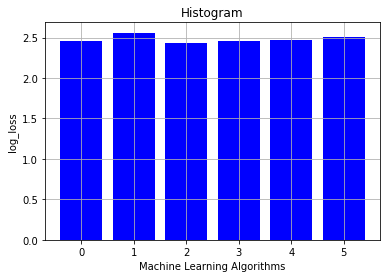

In [36]:
#seed is a function of numpy, which will give the same output each time it is executed.
np.random.seed(100)
names = ('rf','gnb','logreg','knn','DecisTr','svm')

bins = np.arange(len(names))
data= [log_loss_rf,log_loss_gnb,log_loss_logreg,log_loss_knn,log_loss_DecisTr,log_loss_svm]


plt.bar(bins, data, align='center', facecolor='blue')
plt.ylabel('log_loss')
plt.xlabel('Machine Learning Algorithms')
plt.title(r'Histogram')

plt.grid(True)


plt.show()


# *Distribution of Longitude and Latitude in San Francisco map*


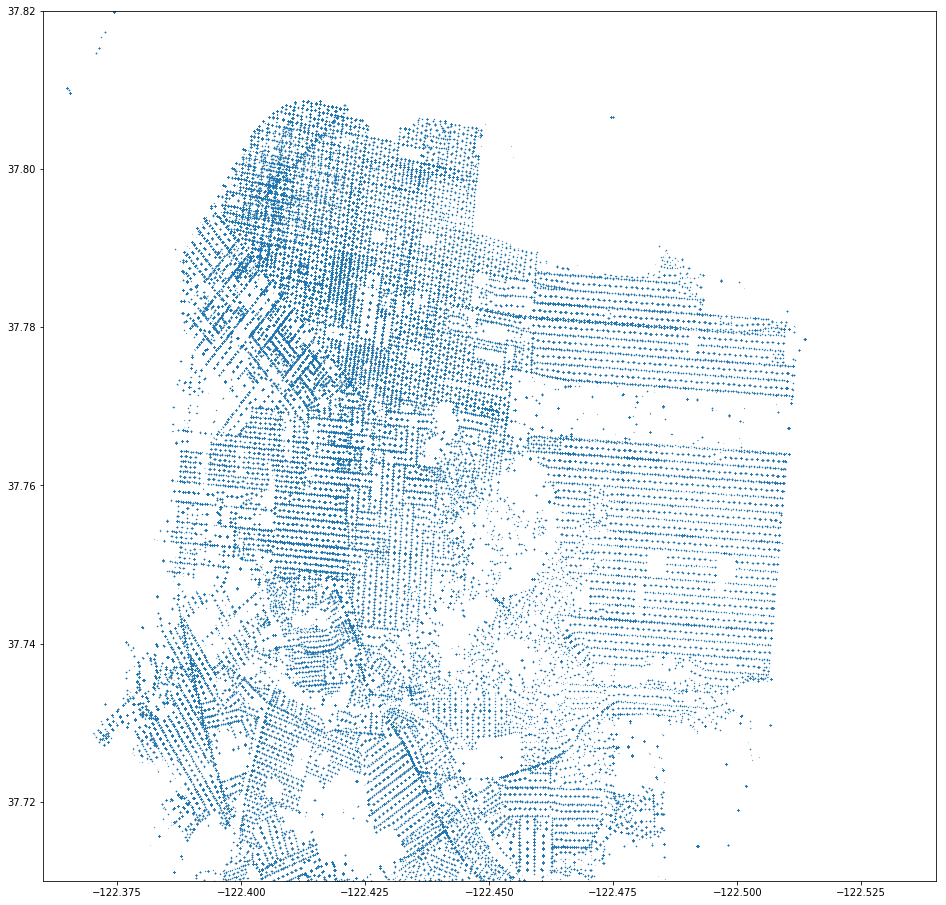

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,16))
plt.ylim(37.71, 37.82)
plt.xlim(-122.360,-122.540)
ax.scatter(data['X'],data['Y'], s=0.01, alpha=1)

# *Hotspot different crimes densities*


In [6]:
def newPalettes():
    palList = []
    colors = [sns.xkcd_rgb["light red"], "red","crimson","orange", "yellow", sns.xkcd_rgb["bright green"],
              "green", sns.xkcd_rgb["forest green"],"cyan","teal","navy","fuchsia","purple"]
    for c in colors:
        palList.append(sns.light_palette(c, as_cmap=True))

    return palList

palettes = newPalettes()

In [7]:
# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("/Users/macbook/Desktop/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]


data = pd.read_csv('/Users/macbook/Desktop/Police_Department_Incident.csv')

#train = train[1:300000]

#Get rid of the bad lat/longs
data['Xok'] = data[data.X < -121].X
data['Yok'] = data[data.Y < 40].Y
data["Date"] = pd.to_datetime(data["Date"], errors='raise')
data = data.dropna()

In [8]:
#Select all rows with the given category, then split them by year.

trainP = data[data.Category == 'PROSTITUTION']

trainList = []
for i in range(2003, 2016):
    trainList.append(trainP[trainP.Date.dt.year == i])

In [22]:
For this list of categories graphs are created. The categories PORNOGRAPHY/OBSCENE MAT, RECOVERED VEHICLE 
pl.figure(figsize=(20, 20 * asp))
for index, trainL in enumerate(trainList):
    pal = palettes[index]
    ax = pl.hexbin(trainL.Xok, trainL.Yok, cmap=pal,
                  bins=5,
                  mincnt=1)
    ax = sns.kdeplot(trainL.Xok, trainL.Yok, clip=clipsize,
                        cmap=pal,
                        aspect=(1 / asp))
        
ax.imshow(mapdata, cmap=pl.get_cmap('gray'),
              extent=lon_lat_box,
              aspect=asp)
pl.draw()

In [23]:
categoryList = ["WARRANTS", "ASSAULT", "RUNAWAY"]

In [44]:
#Distribution of crimes for each month

trainM = data[data.Category == "DRUNKENNESS"]
monthlyList = []
for i in range(1,13):
    monthlyList.append(trainM[trainM.Date.dt.month == i])

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)
/anaconda3/li

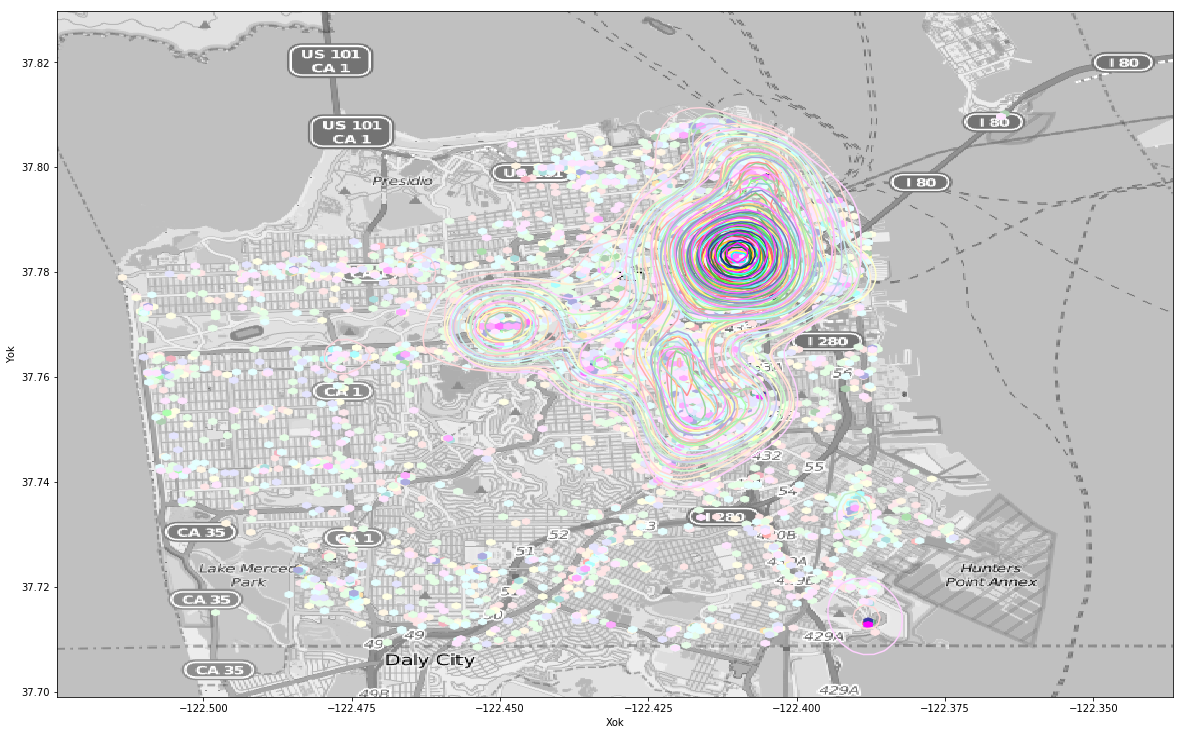

In [45]:
pl.figure(figsize=(20, 20 * asp))
for index, mon in enumerate(monthlyList):
    pal = palettes[index]
    ax = pl.hexbin(mon.Xok, mon.Yok, cmap=pal,
                  bins=5,
                  mincnt=1)
    ax = sns.kdeplot(mon.Xok, mon.Yok, clip=clipsize,
                     cmap=pal,
                     aspect=(1 / asp))

ax.imshow(mapdata, cmap=pl.get_cmap('gray'),
              extent=lon_lat_box,
              aspect=asp)
pl.draw()